<a href="https://colab.research.google.com/github/Veerendra-sys/APortfolio/blob/main/AI_Powered_Face_Mask_Detection_for_Public_Safety.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [ ]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 98% 160M/163M [00:04<00:00, 42.9MB/s]
100% 163M/163M [00:04<00:00, 37.2MB/s]


In [ ]:

# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


Face Mask Detection  
**Created by Veerendra**

This project is a face mask detection system built using deep learning techniques. It detects whether a person is wearing a mask or not in real-time using a webcam or image input.
## Features
- Real-time mask detection
- Built with Python, TensorFlow/Keras, and OpenCV
- Trained on the Kaggle Face Mask Dataset


In [ ]:
!ls


data  face-mask-dataset.zip  kaggle.json  sample_data


Importing the Dependencies



In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_2746.jpg', 'with_mask_2078.jpg', 'with_mask_221.jpg', 'with_mask_2280.jpg', 'with_mask_2533.jpg']
['with_mask_3652.jpg', 'with_mask_2143.jpg', 'with_mask_2520.jpg', 'with_mask_618.jpg', 'with_mask_2487.jpg']


In [ ]:

without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_1781.jpg', 'without_mask_3151.jpg', 'without_mask_691.jpg', 'without_mask_3607.jpg', 'without_mask_3364.jpg']
['without_mask_3465.jpg', 'without_mask_3060.jpg', 'without_mask_3304.jpg', 'without_mask_1086.jpg', 'without_mask_3660.jpg']


In [ ]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


Creating Labels for the two class of Images




In [ ]:

# create the labels
with_mask_labels = [1]*3725
without_mask_labels = [0]*3828
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [ ]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [ ]:

labels = with_mask_labels + without_mask_labels
print(len(labels))
print(labels[0:5])
print(labels[-5:])


7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


Displaying the Images



AxesImage(shape=(228, 163, 3))


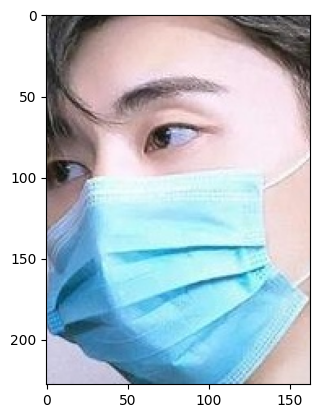

In [ ]:
img = mpimg.imread('/content/data/with_mask/with_mask_1545.jpg')
imgplot=plt.imshow(img)
print(imgplot)

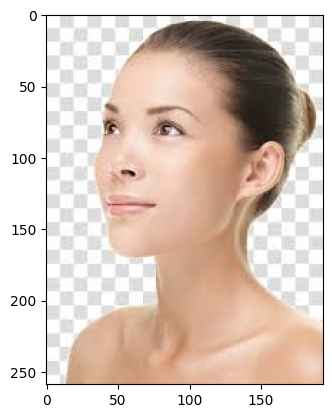

In [ ]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_2925.jpg')
imgplot = plt.imshow(img)
plt.show()

Image Processing
Resize the Images
Convert the images to numpy arrays

In [ ]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
type(data)


list

In [ ]:
len(data)

7553

array([[[233, 210, 179],
        [233, 210, 179],
        [234, 210, 182],
        ...,
        [235, 214, 187],
        [235, 214, 187],
        [235, 214, 187]],

       [[232, 209, 178],
        [232, 209, 178],
        [233, 210, 181],
        ...,
        [235, 214, 187],
        [235, 214, 187],
        [235, 214, 187]],

       [[231, 208, 177],
        [232, 209, 178],
        [232, 209, 179],
        ...,
        [235, 214, 187],
        [235, 214, 187],
        [235, 214, 187]],

       ...,

       [[228, 195, 163],
        [224, 194, 164],
        [211, 187, 159],
        ...,
        [242, 224, 204],
        [242, 224, 204],
        [242, 224, 204]],

       [[230, 195, 162],
        [226, 194, 162],
        [212, 186, 158],
        ...,
        [241, 224, 204],
        [241, 224, 204],
        [241, 224, 204]],

       [[232, 194, 161],
        [227, 193, 161],
        [213, 185, 157],
        ...,
        [242, 225, 206],
        [242, 225, 206],
        [242, 225, 206]]], dtype=uint8)
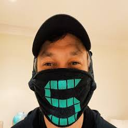

In [ ]:
data[0]


In [ ]:
type(data[0])


numpy.ndarray

In [ ]:
data[0].shape


(128, 128, 3)

In [ ]:

# converting image list and label list to numpy arrays
X = np.array(data)
Y = np.array(labels)


In [ ]:
type(X)


numpy.ndarray

In [ ]:
type(Y)


numpy.ndarray

In [ ]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [ ]:
print(Y)


[1 1 1 ... 0 0 0]


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)


In [ ]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
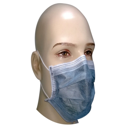

In [ ]:
X_train[0]


In [ ]:
X_train_scaled[0]


array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]])

Building a Convolutional Neural Networks (CNN)



In [ ]:
import tensorflow as tf
from tensorflow import keras


In [ ]:

num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:

# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:

# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 16s 49ms/step - acc: 0.7098 - loss: 0.5848 - val_acc: 0.8529 - val_loss: 0.3051
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - acc: 0.8749 - loss: 0.3131 - val_acc: 0.9107 - val_loss: 0.1984
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - acc: 0.9056 - loss: 0.2320 - val_acc: 0.9190 - val_loss: 0.1987
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - acc: 0.9221 - loss: 0.1933 - val_acc: 0.9223 - val_loss: 0.1903
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - acc: 0.9312 - loss: 0.1704 - val_acc: 0.9041 - val_loss: 0.2338


Model Evaluation



In [ ]:

loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)


48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - acc: 0.9354 - loss: 0.2091
Test Accuracy = 0.9219059944152832


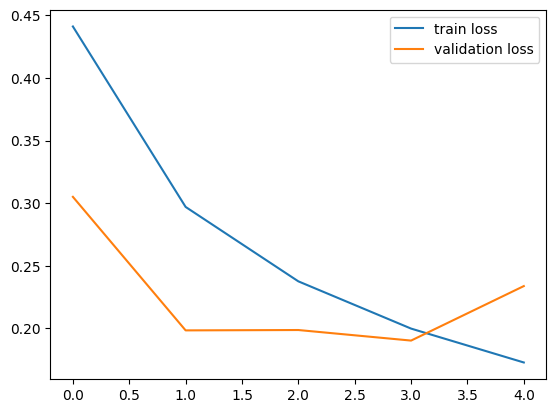

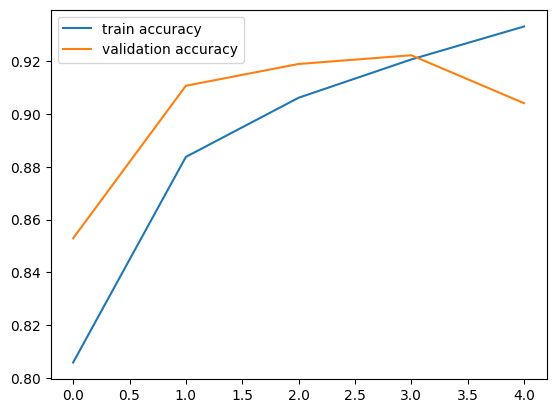

In [ ]:

h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

Predictive System



Path of the image to be predicted: /content/test1.jfif


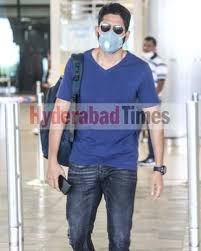

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 627ms/step
[[0.6059154 0.3529628]]
0
The person in the image is not wearing a mask


In [ ]:

input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

Path of the image to be predicted: /content/test2.jfif


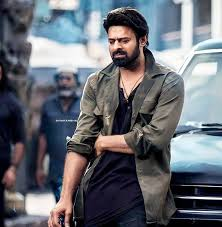

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
[[0.02449891 0.91960347]]
1
The person in the image is wearing a mask


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')